In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import scipy.misc 
import itertools 
import h5py 
import tensorflow 
import cv2 

from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.python.keras.models import load_model
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.regularizers import l1,l2 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,Input, SeparableConv2D, ZeroPadding2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D, AveragePooling2D 
from tensorflow.keras.layers import BatchNormalization, Input, Average
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from math import sqrt
from sklearn.metrics import confusion_matrix
from IPython.display import display 


# Produce stable results 
from numpy.random import seed
from tensorflow import random 

In [ ]:
import tensorflow
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17302930025692690931
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 14587382351037958131
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 3728179857507072336
physical_device_desc: "device: XLA_GPU device"
]


In [ ]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [299,299]

train_path = 'ECG_Image_data/train'
test_path = 'ECG_Image_data/test'

In [ ]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(299,299),
                                              batch_size=32,
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(299,299),
                                            batch_size=32,
                                            class_mode='categorical')

Found 99199 images belonging to 6 classes.
Found 24799 images belonging to 6 classes.


# **FOR VGG16**

In [ ]:
vgg16=VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
x1= Flatten()(vgg16.output)
prediction1 = Dense(6, activation='softmax')(x1)
model1 = Model(inputs = vgg16.inputs, outputs = prediction1)
model1.summary()
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 299, 299, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 299, 299, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 299, 299, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 149, 149, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 149, 149, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 149, 149, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 74, 74, 128)     

In [ ]:
r1 = model1.fit_generator(train_set, validation_data=test_set, epochs=2, steps_per_epoch=20, validation_steps=20)

Epoch 1/2
20/20 [==============================] - 616s 31s/step - loss: 2.0012 - accuracy: 0.6625 - val_loss: 0.9204 - val_accuracy: 0.7703
Epoch 2/2
20/20 [==============================] - 616s 31s/step - loss: 0.9573 - accuracy: 0.7656 - val_loss: 0.9530 - val_accuracy: 0.7453


In [ ]:
model1.save('vgg16.h5')

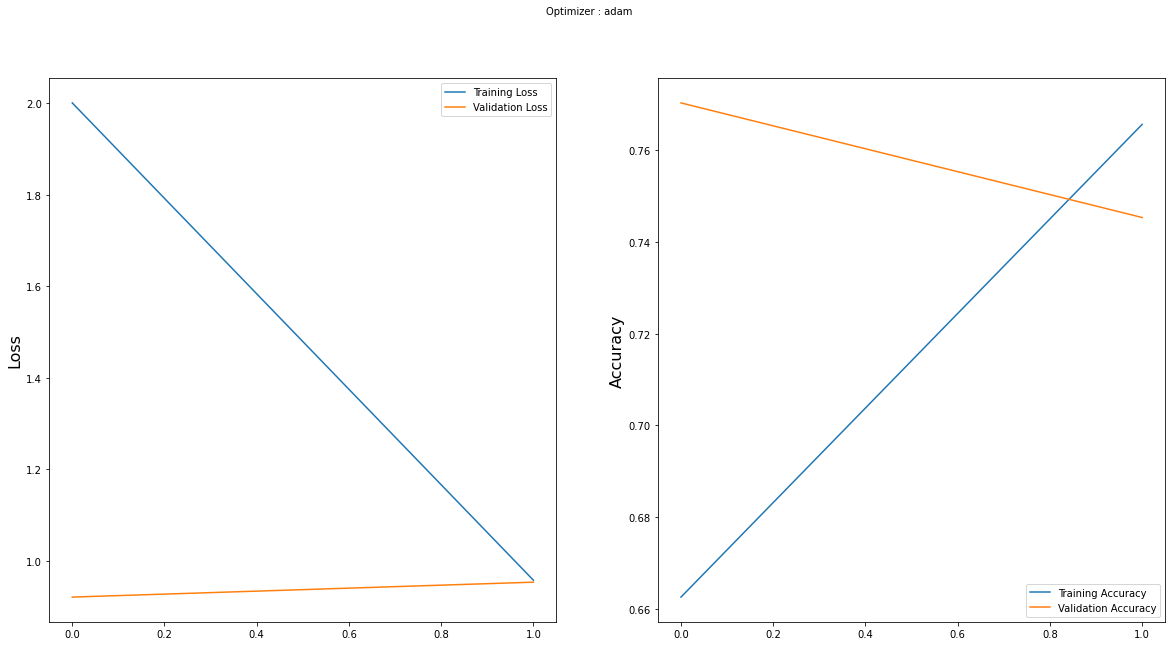

In [ ]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **VGG19**

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
vgg19=VGG19(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
x11= Flatten()(vgg19.output)
prediction11 = Dense(6, activation='softmax')(x11)
model11 = Model(inputs = vgg19.inputs, outputs = prediction11)
model11.summary()
model11.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 299, 299, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 299, 299, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 299, 299, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 149, 149, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 149, 149, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 149, 149, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 74, 74, 128)     

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model11.fit_generator(train_set, validation_data=test_set, epochs=2, steps_per_epoch=20, validation_steps=20,callbacks=[callback])

Epoch 1/2
20/20 [==============================] - 743s 37s/step - loss: 14.1875 - accuracy: 0.6406 - val_loss: 1.1060 - val_accuracy: 0.7672
Epoch 2/2
20/20 [==============================] - 742s 37s/step - loss: 0.8897 - accuracy: 0.7703 - val_loss: 0.9211 - val_accuracy: 0.7500


In [ ]:
model11.save('vgg19.h5')

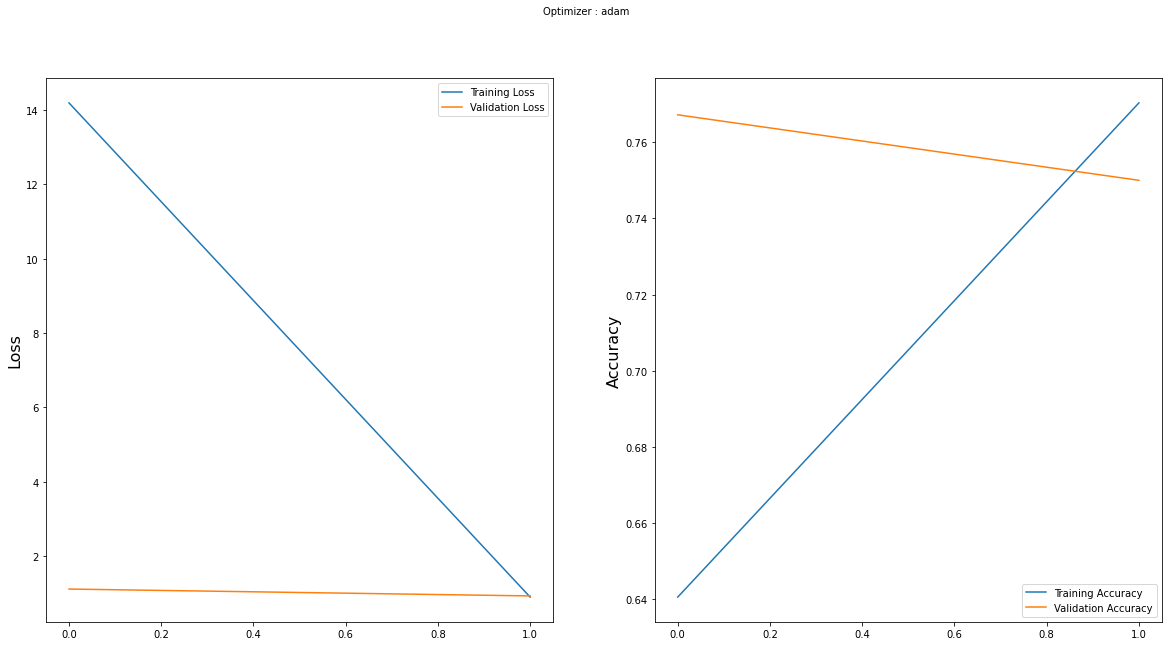

In [ ]:
import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **MobileNet**

In [ ]:
from tensorflow.keras.applications import MobileNet, MobileNetV2
mob = MobileNet(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
x1= Flatten()(mob.output)
prediction1 = Dense(6, activation='softmax')(x1)
model12 = Model(inputs = mob.inputs, outputs = prediction1)
model12.summary()
model12.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 299, 299, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 300, 300, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 149, 149, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 149, 149, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 149, 149, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 149, 149, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 149, 149, 32)    

In [ ]:
r1 = model12.fit_generator(train_set, validation_data=test_set, epochs=2, steps_per_epoch=20, validation_steps=20)

Epoch 1/2
20/20 [==============================] - 176s 9s/step - loss: 2.0096 - accuracy: 0.8672 - val_loss: 38.1578 - val_accuracy: 0.7266
Epoch 2/2
20/20 [==============================] - 177s 9s/step - loss: 0.2961 - accuracy: 0.9422 - val_loss: 31.4879 - val_accuracy: 0.7828


In [ ]:
model12.save('mobilenet.h5')

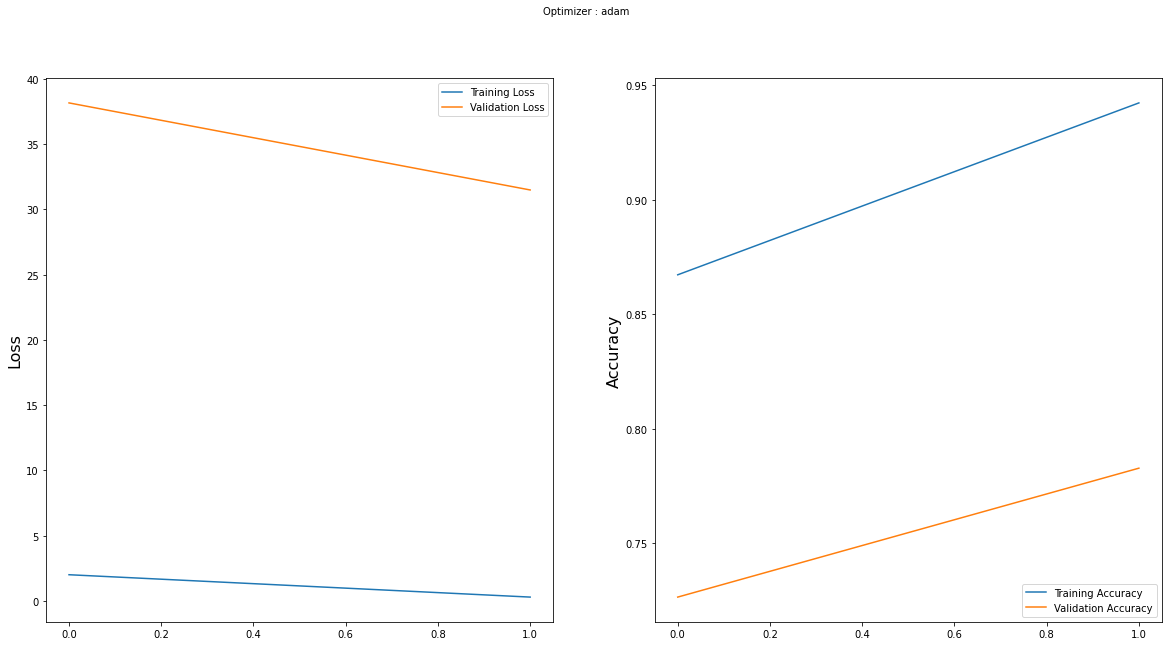

In [ ]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

Combination

In [ ]:
from keras.applications.xception import Xception
from keras.callbacks import ModelCheckpoint
from keras.engine import Input
import tensorflow.keras.backend as K
from keras.layers import GlobalAveragePooling2D, Dense, Reshape, Lambda, LSTM,  merge,concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.optimizers import Adam

In [ ]:
import time
import numpy as np

np.random.seed(1337)

In [ ]:
class CustomImageDataGenerator(ImageDataGenerator):
    """
    Because Xception utilizes a custom preprocessing method, the only way to utilize this
    preprocessing method using the ImageDataGenerator is to overload the standardize method.
    The standardize method gets applied to each batch before ImageDataGenerator yields that batch.
    """

    def standardize(self, x):
        """
        Taken from keras.applications.xception.preprocess_input
        """
        if self.featurewise_center:
            x /= 255.
            x -= 0.5
            x *= 2.
        return 

In [ ]:
def get_training_generator(batch_size=128):
    train_data_dir = 'ECG_Image_data/train/'
    validation_data_dir = 'ECG_Image_data/test/'
    image_datagen = CustomImageDataGenerator(featurewise_center=True)

    train_generator = image_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size
    )

    val_generator = image_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        shuffle=False
    )

    return train_generator, val_generator

In [ ]:
def rgb_to_grayscale(input):
    """Average out each pixel across its 3 RGB layers resulting in a grayscale image"""
    return K.mean(input, axis=3)


def rgb_to_grayscale_output_shape(input_shape):
    return input_shape[:-1]

In [ ]:
batch_size_phase_one = 32
batch_size_phase_two = 16
nb_val_samples = 5000

nb_epochs = 30

img_width = 299
img_height = 299

In [ ]:
# Setting tensorbord callback
now = time.strftime("%c")
tensorboard_callback = TensorBoard(log_dir='./logs/' + 'cnn_rnn ' + now, histogram_freq=0, write_graph=True,
                                   write_images=False)

In [ ]:
# Loading dataset
print("Loading the dataset with batch size of {}...".format(batch_size_phase_one))
train_generator, val_generator = get_training_generator(batch_size_phase_one)
print("Dataset loaded")

Loading the dataset with batch size of 32...
Found 99199 images belonging to 6 classes.
Found 24799 images belonging to 6 classes.
Dataset loaded


**GRU**

In [ ]:
from keras.layers import Dense, Dropout, Embedding, GRU

In [ ]:
# Creating CNN
cnn_model = Xception(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = cnn_model.output
cnn_bottleneck = GlobalAveragePooling2D()(x)

# Make CNN layers not trainable
for layer in cnn_model.layers:
    layer.trainable = False

# Creating RNN
x = Lambda(rgb_to_grayscale, rgb_to_grayscale_output_shape)(input_tensor)
x = Reshape((23, 3887))(x)  # 23 timesteps, input dim of each timestep 3887
x = GRU(2048, return_sequences=True)(x)
rnn_output = GRU(2048)(x)

In [ ]:
x = concatenate([cnn_bottleneck, rnn_output])
predictions = Dense(6, activation='softmax')(x)
model = Model(input_tensor,predictions)

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________

In [ ]:
hist2 = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)

Epoch 1/2
50/50 [==============================] - 557s 11s/step - loss: nan - accuracy: 0.4524 - val_loss: nan - val_accuracy: 0.1006
Epoch 2/2
50/50 [==============================] - 572s 11s/step - loss: nan - accuracy: 0.5246 - val_loss: nan - val_accuracy: 0.1006


In [ ]:
model.save('gru.h5')

In [ ]:
seed(1)
tensorflow.random.set_seed(1)

# Control Variables
batch_size = 128
num_epochs = 20

# VGG16 + GRU

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
# Creating CNN
cnn_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = cnn_model.output
cnn_bottleneck = GlobalAveragePooling2D()(x)

# Make CNN layers not trainable
for layer in cnn_model.layers:
    layer.trainable = False

# Creating RNN
x = Lambda(rgb_to_grayscale, rgb_to_grayscale_output_shape)(input_tensor)
x = Reshape((23, 3887))(x)  # 23 timesteps, input dim of each timestep 3887
x = GRU(2048, return_sequences=True)(x)
rnn_output = GRU(2048)(x)

x = concatenate([cnn_bottleneck, rnn_output])
predictions = Dense(6, activation='softmax')(x)
model = Model(input_tensor,predictions)

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])
model.summary()
hist = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)




Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 299, 299, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 299, 299, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 149, 149, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________

# VGG19 + GRU

In [ ]:
cnn_model = VGG19(weights='imagenet', include_top=False, input_tensor=input_tensor)

x = cnn_model.output
cnn_bottleneck = GlobalAveragePooling2D()(x)

# Make CNN layers not trainable
for layer in cnn_model.layers:
    layer.trainable = False

# Creating RNN
x = Lambda(rgb_to_grayscale, rgb_to_grayscale_output_shape)(input_tensor)
x = Reshape((23, 3887))(x)  # 23 timesteps, input dim of each timestep 3887
x = GRU(2048, return_sequences=True)(x)
rnn_output = GRU(2048)(x)

x = concatenate([cnn_bottleneck, rnn_output])
predictions = Dense(6, activation='softmax')(x)
model = Model(input_tensor,predictions)

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])
model.summary()
hist = model.fit(train_generator, epochs=2, verbose=1,steps_per_epoch=50,
                    validation_data=val_generator,validation_steps=50)



Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 299, 299, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 299, 299, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 149, 149, 64) 0           block1_conv2[0][0]               
_____________________________________________________________________________________